In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
%matplotlib inline

Num GPUs Available:  1


In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
image_gen = ImageDataGenerator(rotation_range=30, #rotate the image 30 degrees
                              width_shift_range=0.1, #shift the pic width by a max of 10%
                              height_shift_range = 0.1, #shift the pic height by a max of 10%
                              rescale = 1/255, #rescale the image by normalizing it
                              shear_range = 0.2, #Shear means cutting away part of the image(max 20%)
                              zoom_range=0.2, #Zoom in by a max of 20%
                               horizontal_flip=True, #allow horizontal flipping
                               fill_mode="nearest" #Fill in the missing pixels with the nearest filled value
                              )

In [4]:
image_shape=(100,100,3)

In [5]:
#Creating the model
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = image_shape, activation="relu",))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [8]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('E:/AI Projects/Image Classification/Dataset/Train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 982 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory('E:/AI Projects/Image Classification/Dataset/Test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 330 images belonging to 2 classes.


In [10]:
train_image_gen.class_indices

{'Apple Braeburn': 0, 'Banana': 1}

In [11]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
from PIL import Image

In [14]:
results = model.fit_generator(train_image_gen, epochs = 5,
                             steps_per_epoch = 250,
                             validation_data = test_image_gen,
                             validation_steps = 12)

Epoch 1/5
250/250 [==============================] - 11s 46ms/step - loss: 1.2602e-05 - accuracy: 1.0000 - val_loss: 1.7524e-06 - val_accuracy: 1.0000
Epoch 2/5
250/250 [==============================] - 11s 46ms/step - loss: 3.4960e-06 - accuracy: 1.0000 - val_loss: 3.6666e-09 - val_accuracy: 1.0000
Epoch 3/5
250/250 [==============================] - 11s 44ms/step - loss: 3.3925e-06 - accuracy: 1.0000 - val_loss: 3.3830e-10 - val_accuracy: 1.0000
Epoch 4/5
250/250 [==============================] - 12s 46ms/step - loss: 1.0440e-06 - accuracy: 1.0000 - val_loss: 5.8400e-10 - val_accuracy: 1.0000
Epoch 5/5
250/250 [==============================] - 11s 44ms/step - loss: 1.2781e-06 - accuracy: 1.0000 - val_loss: 1.0029e-11 - val_accuracy: 1.0000


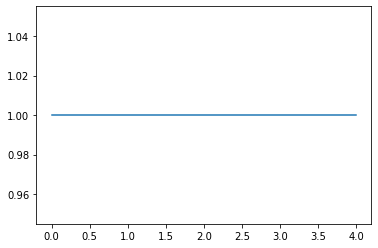

In [16]:
plt.plot(results.history['accuracy'])

In [17]:
model.save('fruit_classifier.h5')